In [1]:
# Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
# Reading the dataset

df = pd.read_csv ('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')

In [3]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
# Checking the number of rows and columns in the data set

df.shape

(92016, 5)

In [5]:
#check for missing values
df.isnull().values.any()

False

In [6]:
# Checking the data types

df.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [7]:
# Using/renaming the fulldate column as "ds" and elecprice column as "y"

df.columns = ["ds", "Tmax", "SysLoad", "GasPrice", "y"]

In [8]:
#convert column ds to datetime

df[ "ds" ] = pd.to_datetime(df[ "ds" ])
df.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [9]:
# Checking the data types again

df.dtypes

ds          datetime64[ns]
Tmax               float64
SysLoad            float64
GasPrice           float64
y                  float64
dtype: object

In [26]:
df.set_index('ds',inplace = True)  # set index as datetime 

In [32]:
# Time Series Specific Exploratory Methods

In [28]:
import statsmodels.api as sm
from pylab import rcParams 

<Figure size 432x288 with 0 Axes>

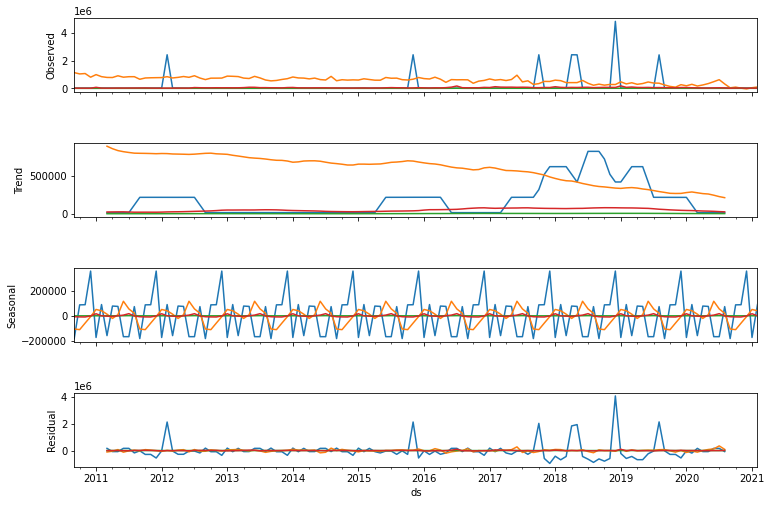

In [31]:
# decompose of time series data
decompose_series = sm.tsa.seasonal_decompose(df.resample('M').sum(),freq=12)
fig = plt.figure()
fig = decompose_series.plot()
fig.set_size_inches(12,8)

In [33]:
# ADF Test

from statsmodels.tsa.stattools import adfuller

In [49]:
# For SysLoad

df_resample = df.resample('M').sum()
adf = adfuller(df_resample['SysLoad'],6)
adf_result = adfuller(df[ 'SysLoad'])
print("\nStatistics analysis\n")
print("Statistic Test : " , adf_result[0])
print("p-value : " , adf_result[1])
print("# n_lags : " , adf_result[2])
print("No of observation: " , adf_result[3])
for key,value in adf_result[4].items():
    print(f" critical value {key} : {value}")


Statistics analysis

Statistic Test :  -18.17067542641451
p-value :  2.4474966090684217e-30
# n_lags :  67
No of observation:  91948
 critical value 1% : -3.430421121531399
 critical value 5% : -2.861571434572286
 critical value 10% : -2.566786731528145


In [50]:
# For GasPrice

df_resample = df.resample('M').sum()
adf = adfuller(df_resample['GasPrice'],6)
adf_result = adfuller(df[ 'GasPrice'])
print("\nStatistics analysis\n")
print("Statistic Test : " , adf_result[0])
print("p-value : " , adf_result[1])
print("# n_lags : " , adf_result[2])
print("No of observation: " , adf_result[3])
for key,value in adf_result[4].items():
    print(f" critical value {key} : {value}")


Statistics analysis

Statistic Test :  -6.793388065452667
p-value :  2.3337605343636574e-09
# n_lags :  48
No of observation:  91967
 critical value 1% : -3.430421106837576
 critical value 5% : -2.86157142807793
 critical value 10% : -2.566786728071412


In [54]:
# For ElecPrice which is now represented as y

df_resample = df.resample('M').sum()
adf = adfuller(df_resample['y'],6)
adf_result = adfuller(df[ 'y'])
print("\nStatistics analysis\n")
print("Statistic Test : " , adf_result[0])
print("p-value : " , adf_result[1])
print("# n_lags : " , adf_result[2])
print("No of observation: " , adf_result[3])
for key,value in adf_result[4].items():
    print(f" critical value {key} : {value}")


Statistics analysis

Statistic Test :  -31.952975699557843
p-value :  0.0
# n_lags :  53
No of observation:  91962
 critical value 1% : -3.430421110703783
 critical value 5% : -2.8615714297867108
 critical value 10% : -2.56678672898094


In [10]:
# Checking the length of the dataset

len(df)

92016

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Spliting the data into 2757 to x- 2757 train-test split, where x is the length of the dataset

df_train, df_test= train_test_split(df,train_size = 2757, test_size= 92016 - 2757,random_state=1)

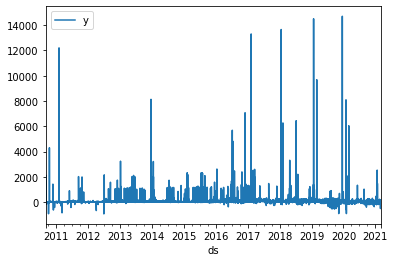

In [13]:
df.plot('ds','y')

In [14]:
# Defining the model

model = Prophet ()

In [15]:
# Fitting the model

model.fit(df) 

In [16]:
# Making predictions
# Predict for 2757 days 

future = model.make_future_dataframe(periods= 2757 , freq= 'D' ) 
forecast = model.predict(future) 
forecast.head() 
forecast[['ds']]

,ds
0,2010-09-01 00:00:00
1,2010-09-01 01:00:00
2,2010-09-01 02:00:00
3,2010-09-01 03:00:00
4,2010-09-01 04:00:00
...,...
94768,2028-09-12 23:00:00
94769,2028-09-13 23:00:00
94770,2028-09-14 23:00:00
94771,2028-09-15 23:00:00


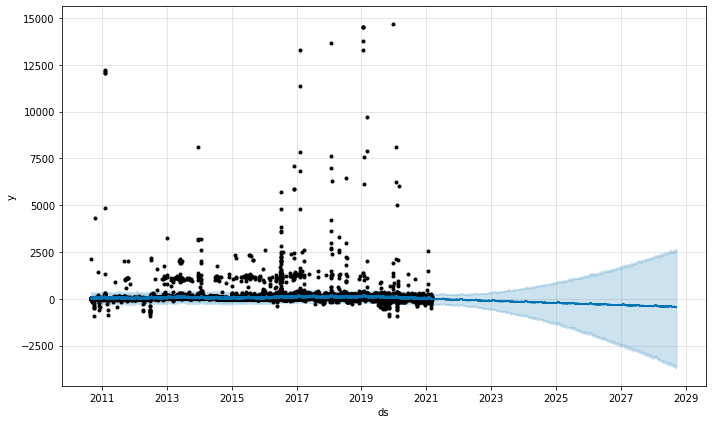

In [116]:
model.plot(forecast) 
plt.show()

In [ ]:
pred = model.predict(future)
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01 00:00:00,35.279425,-231.710353,298.850560,35.279425,35.279425,-7.452193,-7.452193,-7.452193,-4.535477,...,-1.250448,-1.250448,-1.250448,-1.666268,-1.666268,-1.666268,0.0,0.0,0.0,27.827232
1,2010-09-01 01:00:00,35.279663,-258.595585,293.296420,35.279663,35.279663,-10.416161,-10.416161,-10.416161,-7.571902,...,-1.151341,-1.151341,-1.151341,-1.692918,-1.692918,-1.692918,0.0,0.0,0.0,24.863502
2,2010-09-01 02:00:00,35.279901,-254.897742,303.339424,35.279901,35.279901,-19.741732,-19.741732,-19.741732,-17.018850,...,-1.003111,-1.003111,-1.003111,-1.719772,-1.719772,-1.719772,0.0,0.0,0.0,15.538169
3,2010-09-01 03:00:00,35.280139,-261.550743,261.436435,35.280139,35.280139,-29.512606,-29.512606,-29.512606,-26.959562,...,-0.806215,-0.806215,-0.806215,-1.746829,-1.746829,-1.746829,0.0,0.0,0.0,5.767533
4,2010-09-01 04:00:00,35.280377,-262.895078,281.694857,35.280377,35.280377,-32.054353,-32.054353,-32.054353,-29.718716,...,-0.561549,-0.561549,-0.561549,-1.774088,-1.774088,-1.774088,0.0,0.0,0.0,3.226024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94768,2028-09-12 23:00:00,-419.832102,-3605.006020,2929.614567,-3515.662819,2924.077592,-20.788843,-20.788843,-20.788843,-6.764903,...,-1.300414,-1.300414,-1.300414,-12.723527,-12.723527,-12.723527,0.0,0.0,0.0,-440.620946
94769,2028-09-13 23:00:00,-419.986460,-3487.649204,2954.958793,-3517.548190,2925.225123,-10.493032,-10.493032,-10.493032,-6.764903,...,9.607785,9.607785,9.607785,-13.335914,-13.335914,-13.335914,0.0,0.0,0.0,-430.479492
94770,2028-09-14 23:00:00,-420.140817,-3547.598565,2970.518765,-3519.433560,2927.846943,-7.381334,-7.381334,-7.381334,-6.764903,...,13.228475,13.228475,13.228475,-13.844906,-13.844906,-13.844906,0.0,0.0,0.0,-427.522151
94771,2028-09-15 23:00:00,-420.295174,-3544.068441,2932.395830,-3521.318931,2930.540987,-23.719953,-23.719953,-23.719953,-6.764903,...,-2.708586,-2.708586,-2.708586,-14.246464,-14.246464,-14.246464,0.0,0.0,0.0,-444.015128


In [ ]:
# from the above table, we only consider ds, yhat_lower, yhat_upper, and yhat because these are the variables that will yield the predicted results 
# with respect to the date specified.

In [ ]:
# Getting the desired columns

pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2010-09-01 00:00:00,27.827232,-231.710353,298.850560
1,2010-09-01 01:00:00,24.863502,-258.595585,293.296420
2,2010-09-01 02:00:00,15.538169,-254.897742,303.339424
3,2010-09-01 03:00:00,5.767533,-261.550743,261.436435
4,2010-09-01 04:00:00,3.226024,-262.895078,281.694857
...,...,...,...,...
94768,2028-09-12 23:00:00,-440.620946,-3605.006020,2929.614567
94769,2028-09-13 23:00:00,-430.479492,-3487.649204,2954.958793
94770,2028-09-14 23:00:00,-427.522151,-3547.598565,2970.518765
94771,2028-09-15 23:00:00,-444.015128,-3544.068441,2932.395830


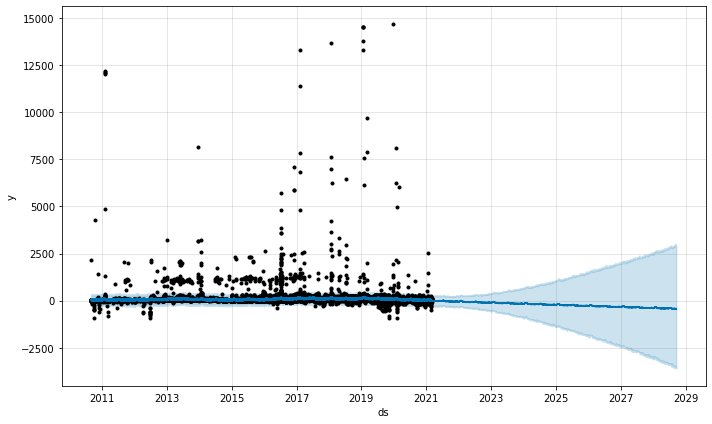

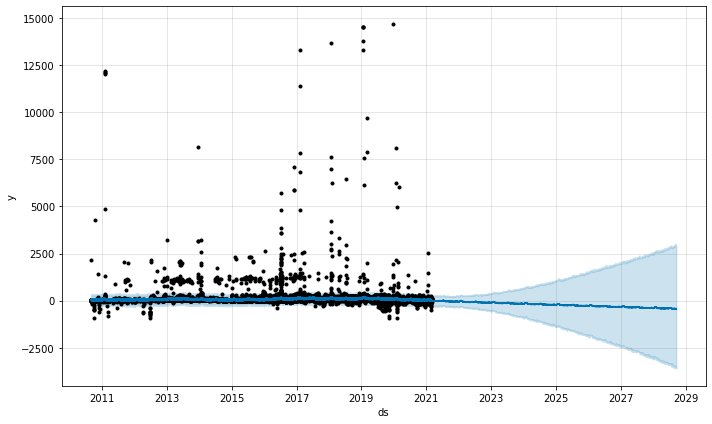

In [117]:
# making forecast

model.plot(pred)

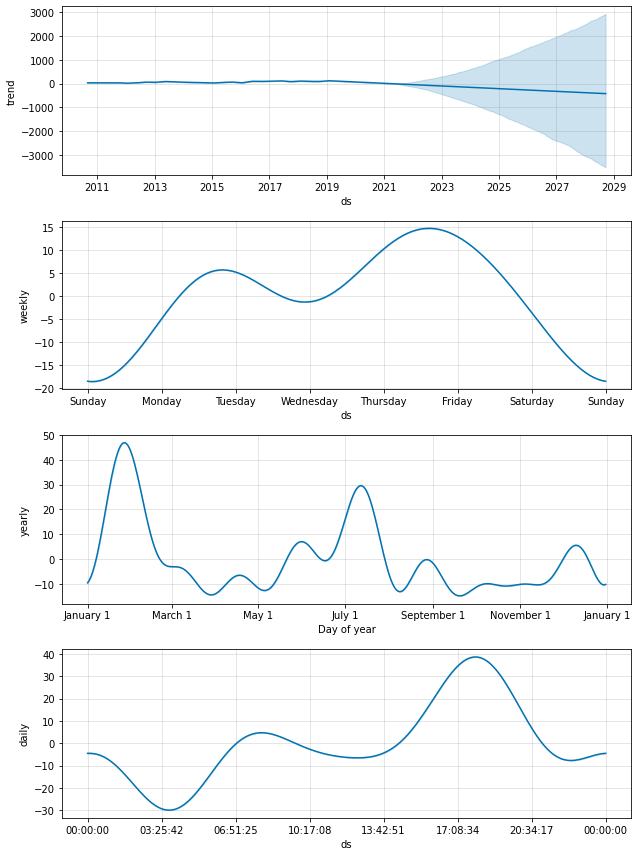

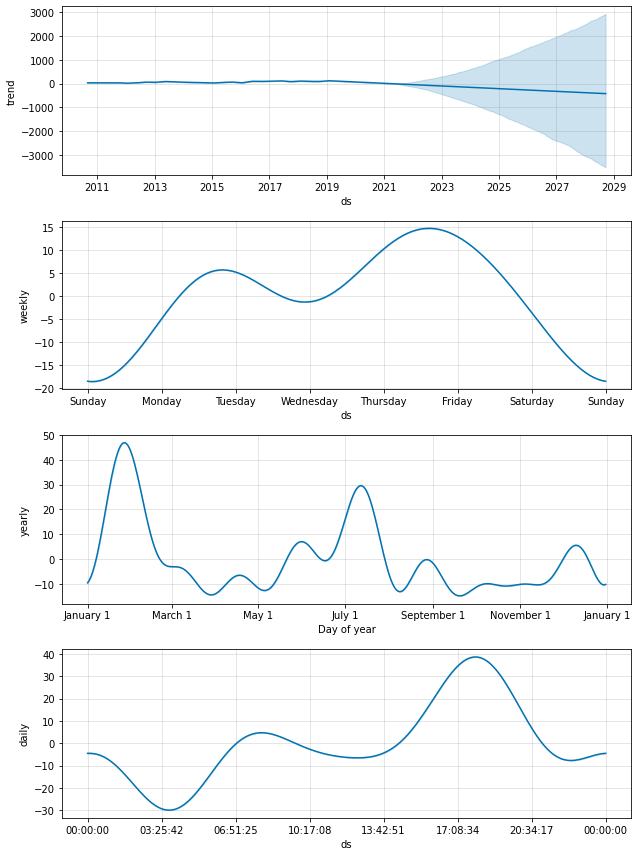

In [ ]:
# Checking trends in the data: daily, weekly, and yearly

model.plot_components(pred)

In [55]:
from sklearn.metrics import mean_absolute_error

In [63]:
metric_df = forecast.set_index('ds')[['yhat']]

In [71]:
y_true = df['y'].values
y_pred = forecast['yhat'].values
# To get the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
round(rmse, 3)
mean_squared_error( metric_df.y_true, metric_df.y_pred)

ValueError: ignored

In [ ]:
# calculate MAE between expected and predicted values
y_true = df['y'].values
y_pred = forecast['yhat'].values
# To get the Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
round(rmse, 3)

In [60]:
# calculate MAE between expected and predicted values
y_true = df['y'].values
y_pred = forecast['yhat'].values
# To get the Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
round(rmse, 3)

ValueError: ignored

In [147]:
# Next exercise is to build a multivariate forecast model using fbprophet
# Defining the model

model = Prophet ()

In [148]:
# Adding other variables (SysLoad, Tmax, and GasPrice) to the forecast model as a regressor on fbprophet

In [149]:
model.add_regressor('SysLoad = add1')

In [150]:
model.add_regressor('Tmax = add2')

In [151]:
model.add_regressor('GasPrice = add3')

In [153]:
df_columns = ["ds","add1","add2","add3","y"]

In [154]:
# Fitting the model

model.fit(df)

ValueError: ignored

In [141]:
# Again, spliting the data into 2757 to x- 2757 train-test split, where x is the length of the dataset

df_train, df_test= train_test_split(df,train_size = 2757, test_size= 92016 - 2757,random_state=1)

In [155]:
# Making predictions
# Predict for 92016 minus 2757 days 

future = model.make_future_dataframe(periods= 2757, freq= 'D' ) 
forecast = model.predict(future) 
forecast.head() 
forecast[['ds']]

Exception: ignored